# Attention : 
# Faire "File -> Save a copy in Drive" avant de commencer à modifier le notebook, sinon vos modifications ne seront pas sauvegardées.


In [ ]:
!wget http://webia.lip6.fr/~dancette/deep-learning/assets/TP1-2-data.zip
!unzip TP1-2-data.zip
 
!wget http://webia.lip6.fr/~dancette/deep-learning/assets/TP1-2/tools.py

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
 
import numpy as np
%run 'tools.py'
from os.path import join
 
data_path = "data"

# Partie 1 : SIFT

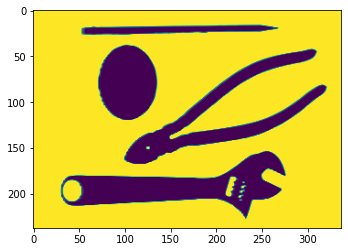

In [3]:
# example images
I = read_grayscale(join(data_path, 'tools.tiff'))
I2 = read_grayscale(join(data_path, 'Scene/CALsuburb/image_0205.jpg'))
plt.imshow(I)

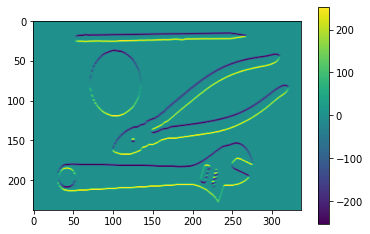

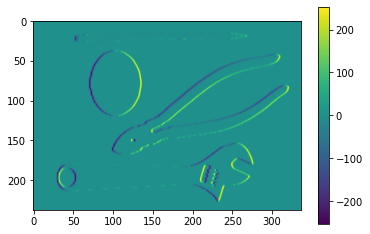

In [4]:
def compute_grad(I):
    #####################
    ## Votre code ici  ##
    #####################
    
    # Mx = 0.25*np.array([
    # [-1, 0, 1], 
    # [-2, 0, 2], 
    # [-1, 0, 1]]
    # )
    # My = 0.25*np.array([
    # [-1, -2, 1], 
    # [0, 0, 0], 
    # [1, 2, 1]]
    # )
 
    hx=  0.25*np.array([
    [-1],[0],[1]
    ])
 
    hy = np.array([
    [1],[2],[1]
    ])
    
    Ix = conv_separable(I, hy, hx)
    Iy = conv_separable(I, hx, hy)
    
    ####################
    ##      FIN        #
    ####################
    return Ix, Iy
 
# example d'affichage du résultat
Ix, Iy = compute_grad(I)
plt.imshow(Ix)
plt.colorbar()
plt.show()
plt.imshow(Iy)
plt.colorbar()
plt.show()

In [11]:
#TESTING
 
array = np.array([
  [0, 1, 0], 
  [0, 1, 0], 
  [0, 1, 0]]
)
 
res_x, res_y = compute_grad(array)
 
if np.all(res_x == np.array([
  [0., 0., 0.],
  [0., 0., 0.],
  [0., 0., 0.]])
):
 print("Success!")
else:
 print("Fail!")
if np.all(res_y == np.array([
  [ 1.,  0., -1.],
  [ 1.,  0., -1.],
  [ 1.,  0., -1.]])
):
 print("Success!")
else:
 print("Fail!")

Success!
Success!


In [12]:
def compute_grad_mod_ori(I):
    #####################
    ## Votre code ici  ##
    #####################
 
    Ix, Iy = compute_grad(I)
    Gn = np.sqrt(Ix**2+ Iy**2)
    Go = compute_grad_ori(Ix, Iy, Gn)
    ####################
    ##      FIN        #
    ####################
    return Gn, Go

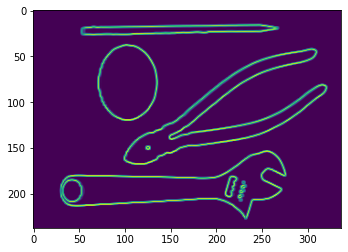

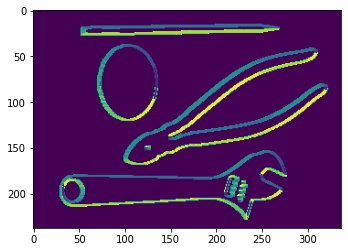

In [13]:
Gn, Go = compute_grad_mod_ori(I)
plt.imshow(Gn)
plt.show()
plt.imshow(Go)
plt.show()

In [14]:
def compute_histogram(g_n, g_o):
    """
    g_n and g_o are 4x4 matrices that contain the norm, and the discretized orientation.
    Warning: g_o can contain -1, those values should be discarded.
    """
    hist = np.zeros((8))
 
    #####################
    ## Votre code ici  ##
    #####################
    for i in range(g_n.shape[0]):
      for j in range(g_o.shape[0]):
        if g_o[i][j] != -1 :
          hist[g_o[i][j]] += g_n[i][j]
                 
    ####################
    ##      FIN        #
    ####################
    return hist

In [15]:
#### TEST
g_n = np.array([
    [0.65, 0.45, 0.73, 0.20],
    [0.53, 0.68, 0.58, 0.05],
    [0.71, 0.27, 0.72, 0.73],
    [0.88, 0.52, 0.49, 0.79]])
 
g_o = np.array([
    [0, 1, 7, 4],
    [1, 2, 6, 0],
    [-1, 2, 2, 3],
    [0, 1, 5, 4],
])
 
if not np.all(compute_histogram(g_n, g_o) == np.array([1.58, 1.5 , 1.67, 0.73, 0.99, 0.49, 0.58, 0.73])):
    raise Exception("Error in compute_histogram")
else:
    print("Success !")

Success !


In [16]:
def compute_sift_region(Gn, Go, mask):
    t_min=.5
    t_max=.2
    with_l2 = True
 
    patch_size = 16
    sift = np.zeros((128)) 
 
    if mask is not None:
        Gn = Gn * mask
    
    idx = 0
    for k in range(0, patch_size, 4):
        for l in range(0, patch_size, 4):
            hist = compute_histogram(Gn[l:l+4,k:k+4], Go[l:l+4,k:k+4])            
            sift[idx:idx+8] = hist
            idx += 8
 
    norm = np.linalg.norm(sift, ord=2)
    # min thresholding on norm
    if norm <= t_min:
        return np.zeros((128))
    # l2-normalization
    if with_l2:
        sift = sift / norm
    # max thresholding on values
    sift[sift >= t_max] = t_max
    # l2-normalization
    if with_l2:
        norm = np.linalg.norm(sift, ord=2)
        sift = sift / norm
    return sift

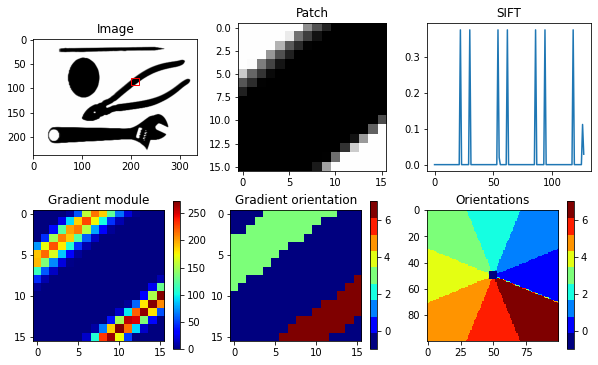

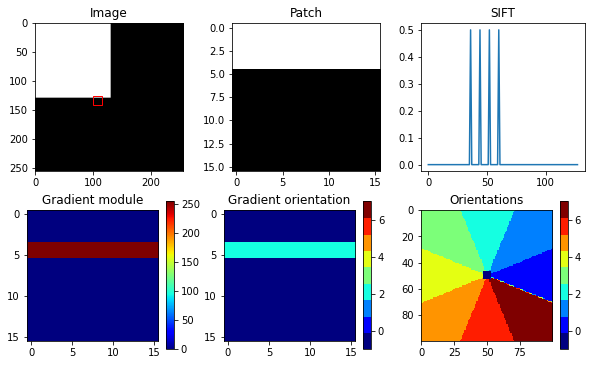

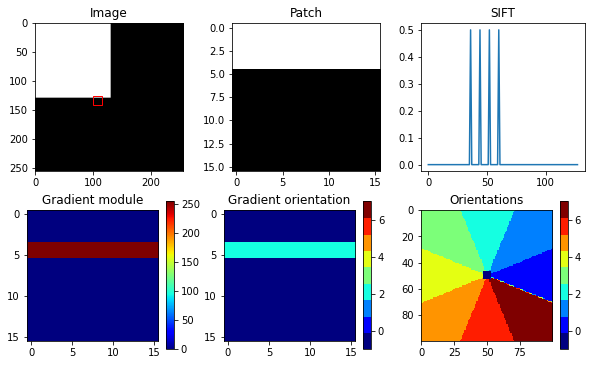

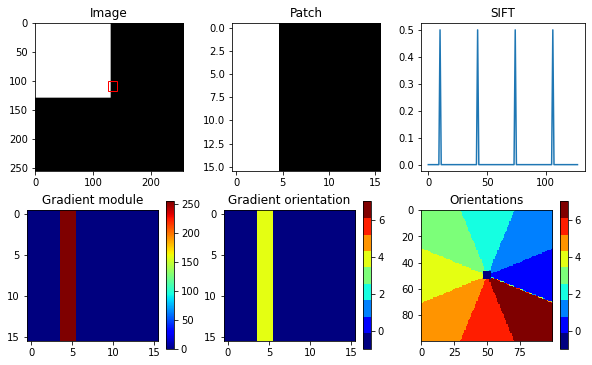

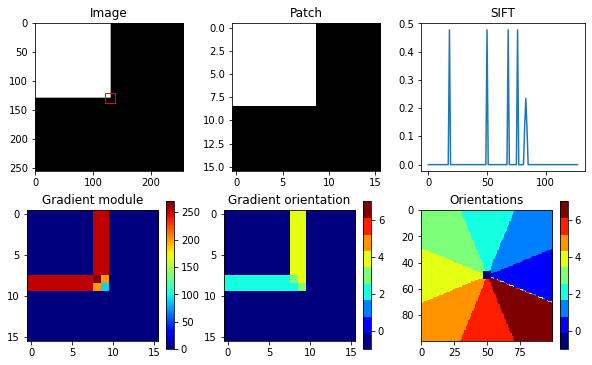

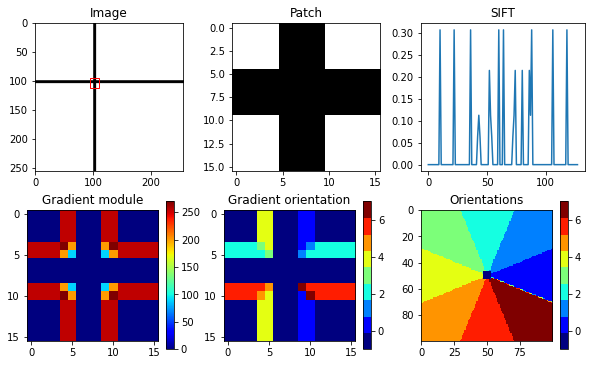

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.30619553, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.30619553, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.30619553, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06391033, 0.11218   , 0.06391033,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.21405539, 0.11218   , 0.06391033,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.30619553, 0.        , 0.        , 0.        , 0.30619553,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06391033, 0.11218   , 0.21405

In [17]:
# Example of viz of SIFTs
# set gausm to True to apply mask weighting of gradients
display_sift_region(I, compute_grad_mod_ori, compute_sift_region, x=200, y=78, gausm=True)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=True)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=125, y=100, gausm=True)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=121, y=121, gausm=True)
display_sift_region(toy_im(), compute_grad_mod_ori, compute_sift_region, x=95, y=95, gausm=True)

In [18]:
def compute_sift_image(I):
    x, y = dense_sampling(I)
    im = auto_padding(I)
    m = gaussian_mask()
    
    #####################
    ## Votre code ici  ##
    #####################
    # Ici, effectuez les calculs sur l'image globale (norme, gradients)
    Gn, Go = compute_grad_mod_ori(im)
    ####################
    ##      FIN        #
    ####################
    patch_size=16
    sifts = np.zeros((len(x), len(y), 128))
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            #####################
            ## Votre code ici  ##
            #####################
           
              sifts[i, j, :] = compute_sift_region(Gn[xi:xi+patch_size, yj:yj+patch_size], Go[xi:xi+patch_size, yj:yj+patch_size], m)
             # TODO SIFT du patch de coordonnee (xi, yj)

            ####################
            ##      FIN        #
            ####################
    return sifts

# Compute SIFT

Le calcul durera plusieurs minutes.

In [19]:
max_images_per_class = 10  # You can change this to None to compute the whole dataset (takes quite some time)

save_path = "tmp"
dir_sc = os.path.join(data_path, 'Scene')
dir_sift = os.path.join(save_path, 'sift')
inames, ilabls, cnames = load_dataset(dir_sc, images_per_class=max_images_per_class)
sifts_list_by_image = compute_load_sift_dataset(dir_sc, dir_sift, inames, compute_sift_image)

Computing or loading SIFTs


100%|██████████| 150/150 [05:04<00:00,  2.03s/it]


# Partie 2 : Dictionnaire visuel

In [20]:
from sklearn.cluster import KMeans

path_vdict = os.path.join(save_path, 'kmeans', 'vdict.npy')
os.makedirs(os.path.join(save_path, 'kmeans'), exist_ok=True)

In [21]:
# Code here the `compute_visual_dict` function
def compute_visual_dict(sift, n_clusters=1000, n_init=1, verbose=1):
    # reorder data
    dim_sift = sift[0].shape[-1]
    sift = [s.reshape(-1, dim_sift) for s in sift]
    sift = np.concatenate(sift, axis=0)
    # remove zero vectors
    keep = ~np.all(sift==0, axis=1)
    sift = sift[keep]
    # randomly pick sift
    ids, _ = compute_split(sift.shape[0], pc=0.05)
    sift = sift[ids]

    # TODO compute kmeans on `sift`, get cluster centers, add zeros vector, and return visual dict
    #####################
    ## Votre code ici  ##
    #####################

    kmeans = KMeans(n_clusters = n_clusters, n_init=n_init, verbose=verbose)
    kmeans.fit(sift)
    center = kmeans.cluster_centers_
    np.append(center, np.zeros(128))
    vdict = center
    
    ####################
    ##      FIN        #
    ####################
    return vdict


In [22]:
# Run the visual dict computation (saved the first time)
vdict = compute_or_load_vdict(dir_sc, dir_sift, inames, compute_sift_image, path_vdict, compute_visual_dict)

Computing or loading visual dict
Computing or loading SIFTs


100%|██████████| 150/150 [00:00<00:00, 1515.08it/s]


Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 125399620.19605799
start iteration
done sorting
end inner loop
Iteration 1, inertia 123858924.47084416
start iteration
done sorting
end inner loop
Iteration 2, inertia 123492543.29094553
start iteration
done sorting
end inner loop
Iteration 3, inertia 123396494.33708933
start iteration
done sorting
end inner loop
Iteration 4, inertia 123357073.00037746
start iteration
done sorting
end inner loop
Iteration 5, inertia 123313905.74311252
start iteration
done sorting
end inner loop
Iteration 6, inertia 123275442.7355999
start iteration
done sorting
end inner loop
Iteration 7, inertia 123257164.44795316
start iteration
done sorting
end inner loop
Iteration 8, inertia 123239973.19873908
start iteration
done sorting
end inner loop
Iteration 9, inertia 123231686.38621981
start iteration
done sorting
end inner loop
Iteration 10, inertia 123228170.55460653
start iteration
done sorting
end inner loop
Iteratio

In [23]:
# Study of the dict

# choose random images
indexes = np.random.randint(0, len(inames), 30)
sifts = [sifts_list_by_image[i] for i in indexes]
chosen_inames = [inames[i] for i in indexes]

regions, sifts = get_regions_and_sifts(dir_sc, chosen_inames, sifts) # Compute SIFT and regions from 30 random images
# display_images(regions[np.random.choice(len(regions), 100)]) # Show 100 random regions

centers = list(range(20))
for center in centers:
  center_vect = vdict[center]
  dist = ((sifts - center_vect)**2).sum(axis=1)
  # get best 100
  top100 = dist.argsort()[:100]
  top100_regions = regions[top100]
  display_images(top100_regions) # Show 100 random regions

Output hidden; open in https://colab.research.google.com to view.

# Partie 3 : BoW

In [24]:
# TODO Compute BoW for an image
# indication: scipy.spatial.distance_matrix
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance_matrix

def compute_feats(vdict, image_sifts):
    """
    vdict: (num_clusters, 128): visual dictionnary containing all clusters.
    image_sifts: (H, W, 128) all sift features from the given image
    """
    # flatten sifts
    sifts = image_sifts.reshape(-1, 128)  # (N, 128)
    feats = np.zeros(vdict.shape[0])
    ##################### 
    ## Votre code ici  ##
    #####################
    # compute distance from image sifts to vdict
    distances = euclidean_distances(vdict, sifts)
    argmins = distances.argmin(0)
    
    for hj in argmins:
      feats[hj] +=1

    feats = feats/ np.linalg.norm(feats)
    ####################
    ##      FIN        #
    ####################
    return feats


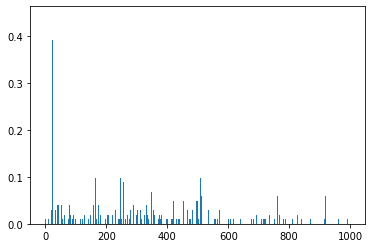

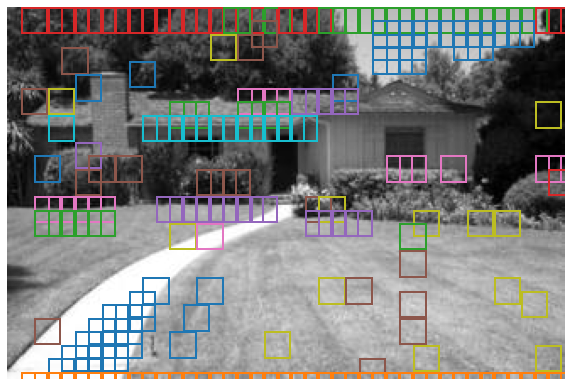

(9, 16, 16)


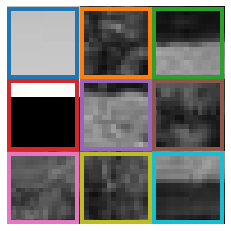

In [25]:
# Visualize your BoW on an image
img_id = 4

iname = inames[img_id]
ipath = os.path.join(dir_sc, iname)
im = read_grayscale(ipath)
sift = sifts_list_by_image[img_id]
regions = compute_regions(im)
feats = compute_feats(vdict[:-1], sift)

display_vdregions_image(im, vdict[:-1], sift, feats, vdregions=None) # if you have vdregions, add it as input here